In [1]:
from IPython.core.display import HTML

name = '2013-08-12-Brazil_map'

html = """
<small>
<p> This post was written as an IPython notebook.  It is available for
<a href="https://ocefpaf.github.com/python4oceanographers/downloads/
notebooks/%s.ipynb">download</a> or as a static
<a href="https://nbviewer.ipython.org/url/ocefpaf.github.com/
python4oceanographers/downloads/notebooks/%s.ipynb">html</a>.</p>
<p></p>""" % (name, name)

%matplotlib inline
from matplotlib import style
style.use('ggplot')

Creating a map of Brazil with correct states boundaries with `basemap`.

<!-- PELICAN_BEGIN_SUMMARY -->
[basemap](http://matplotlib.org/basemap/) is an excellent tool, but its database lacks up-to-date information regarding the modern states boundaries in Brazil.  This post is to show how to overcome that with an custom `shapefile`.
<!-- PELICAN_END_SUMMARY -->


The political boundaries data shipped with basemap is OK for North America and
Europe, but it is outdated by several
[years](http://pt.wikipedia.org/wiki/Hist%C3%B3ria_de_Mato_Grosso#Divis.C3.A3o_do_estado)
for South America.  In order to draw a more accurate map we need to use custom
data from more up-to-date sources.

One source of data are the `shapefiles` from the
["GADM database of Global Administrative Areas"](http://www.gadm.org/country).
With that data and matplotlib's Polygon we can crate a similar `drawstates`
function to override basemap's defaults.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap


def make_map():
    fig, ax = plt.subplots()
    m = Basemap(projection='merc', llcrnrlat=-35, urcrnrlat=7,
                llcrnrlon=-77, urcrnrlon=-32, resolution='i')
    m.ax = ax
    m.fillcontinents()
    return fig, m

Now let's define a new drawstates that makes use of the updated dataset we downloaded:

In [3]:
def drawstates(ax, shapefile='/home/filipe/00-NOBKP/OcFisData/brazil/brazil'):
        shp = m.readshapefile(shapefile, 'states', drawbounds=True)
        for nshape, seg in enumerate(m.states):
            poly = Polygon(seg, facecolor='0.75', edgecolor='k')
            ax.add_patch(poly)

Finally, let's plot the original basemap method to draw states:

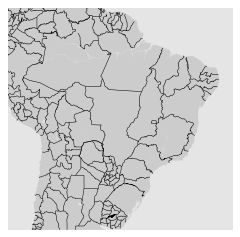

In [4]:
fig, m = make_map()
m.drawcountries()
_ = m.drawstates()

And our custom shapefile:

OSError: cannot locate /home/filipe/00-NOBKP/OcFisData/brazil/brazil.shp

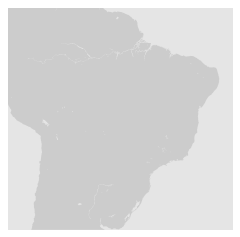

In [5]:
fig, m = make_map()
drawstates(m.ax)

See the difference?

In [ ]:
HTML(html)